In [1]:
from KN import *
import matplotlib.pyplot as plt
import time
import numpy as np

<Figure size 700x700 with 1 Axes>

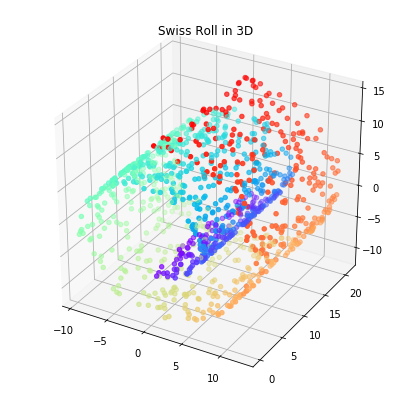

<Figure size 432x288 with 0 Axes>

In [2]:
data,_ = swiss_roll_dataset(number_of_samples=1200,plot=True)

# Classical K-means algorithm

In [10]:
class K_Means:

    def __init__(self, k=6, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        # Centroids initialization
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            
            # Classification
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            # Distance calculation using the 2 Norm distance
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid],ord=2) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            # Centroids redifinition
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [13]:
clf = K_Means(k=4)
clf.fit(data)

TypeError: 'K_Means' object does not support indexing